In [1]:
import json
import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns
import math

In [2]:
print(os.getcwd())
with open('RecMeasureNW.json') as f:
    data = json.load(f)
    for d in data:
        mps = d['msgs']/d['duration']
        d['mps'] = mps
        
        d['time'] = d['time']/1000
        d['actor'] = 'p'+str(d['actor'])

df = pd.DataFrame(data)
df = df[["time", "actor", "mps"]]
df = df.rename(columns={'actor': 'Processor'})


/Users/jonasspenger/work/jspenger/Windowed-CRDT/src/main/python


In [3]:
ticks = np.unique(df['time'].values)
l = []
for tick in ticks:
    l.append({
        "time": tick,
        "Processor": "Overall",
        "mps": df.loc[df['time'] == tick]['mps'].sum()
    })
df = pd.concat([df, pd.DataFrame(l)])

df = df[df['time'] >= 1].reset_index(drop=True)
df['time'] = df['time'] - 1

In [4]:
# def log_(mps):
#     if mps > 0:
#         return math.log(mps)
#     elif mps == 0:
#         return 0
#     else:
#         return -math.log(-mps)
# df['mps'] = df['mps'].apply(lambda x: log_(x))

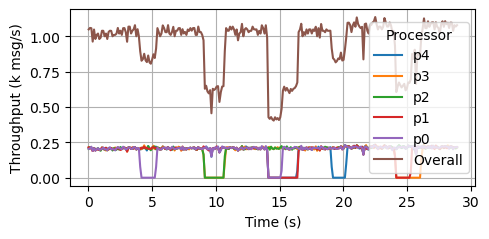

In [5]:
fig, ax = plt.subplots(figsize=(5,2.5))
sns.lineplot(data=df, x="time",y ="mps", hue="Processor", ax=ax)
ax.grid()
ax.set_xlabel('Time (s)')
ax.set_ylabel('Throughput (k msg/s)')
ax.set_xticks(np.arange(0, 31, 5))
# ax.title.set_text('Performance Overtime (Processors work independently)')
sns.move_legend(ax, "center right")
plt.tight_layout()
plt.savefig('RecFigNoWait.png', dpi=300)
plt.show()
# fig.savefig('RecFigNoWait.png', dpi=300)
